# Simple training (no hyperparameter tuning)
Tips and tricks: https://inclass.kaggle.com/c/deloitte-tackles-titanic/forums/t/9841/getting-high-scores-without-looking-at-actual-data-set

In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble, svm
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn import metrics

#Plots config
%matplotlib inline
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [484]:
#Add plots module to path
import sys
sys.path.append('/Users/Edu/Development/open-source/sklearn-model-evaluation')
import plots as p
import helpers as h
import report as r

## Data loading

In [485]:
#Read the data
train = pd.read_csv("train_clean.csv", index_col='PassengerId')
test = pd.read_csv('test_clean.csv', index_col='PassengerId')

## Model training

In [486]:
#RandomForest
rf = ensemble.RandomForestClassifier(n_jobs = -1,
                                     bootstrap = True,
                                     criterion = 'entropy',
                                     max_features = 'log2',
                                     n_estimators = 100)
#AdaBoost
ab = ensemble.AdaBoostClassifier(n_estimators = 10)
#SVC
svc = svm.SVC(C = 1000,
              gamma = 0.001,
              kernel = 'rbf')

In [487]:
#Prepare train and test features
train_x = train.drop(['Survived'], axis=1).values
test_x = test.values
#Prepare train and test scaled features (for SVC)
scaler = preprocessing.StandardScaler().fit(train_x)
train_x_scaled = scaler.transform(train_x)
test_x_scaled  = scaler.transform(test_x)
#Prepare train outcome
train_y = train['Survived']

#Create feature list
feature_list = list(train.drop(['Survived'], axis=1))

In [488]:
#Train random forest
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [489]:
#Train svc
svc.fit(train_x_scaled, train_y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [490]:
#Train adaboost
ab.fit(train_x, train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=10, random_state=None)

## Predict on training set (using cross-validation)

In [491]:
#Since we are using all data for training, generate predictions
#for evaluation using cross-validation
rf_pred  = cross_validation.cross_val_predict(rf,
                                              train_x,
                                              train_y,
                                              cv=5)

In [492]:
svc_pred = cross_validation.cross_val_predict(svc,
                                              train_x_scaled,
                                              train_y,
                                              cv=5)

In [493]:
ab_pred  = cross_validation.cross_val_predict(ab,
                                              train_x,
                                              train_y,
                                              cv=5)

## Predicting scores on training set (using cross_validation)

In [494]:
rf_score  = cross_validation.cross_val_score(rf,
                                            train_x,
                                            train_y,
                                            cv=5)

## Model evaluation

In [495]:
print("RandomForest")
print(metrics.classification_report(train_y, rf_pred))
print("\n\n\n")

print("SVC")
print(metrics.classification_report(train_y, svc_pred))
print("\n\n\n")

print("AdaBoost")
print(metrics.classification_report(train_y, ab_pred))

RandomForest
             precision    recall  f1-score   support

        0.0       0.83      0.86      0.84       549
        1.0       0.76      0.72      0.74       342

avg / total       0.80      0.80      0.80       891





SVC
             precision    recall  f1-score   support

        0.0       0.85      0.88      0.86       549
        1.0       0.79      0.76      0.77       342

avg / total       0.83      0.83      0.83       891





AdaBoost
             precision    recall  f1-score   support

        0.0       0.85      0.86      0.86       549
        1.0       0.77      0.75      0.76       342

avg / total       0.82      0.82      0.82       891



In [496]:
#Compute accuracy (that's the evaluation metric 
#for this competition)
print("RandomForest accuracy:")
print(metrics.accuracy_score(train_y, rf_pred))
print("\nSVC accuracy:")
print(metrics.accuracy_score(train_y, svc_pred))
print("\nAdaBoost accuracy:")
print(metrics.accuracy_score(train_y, ab_pred))

RandomForest accuracy:
0.804713804714

SVC accuracy:
0.830527497194

AdaBoost accuracy:
0.821548821549


## Feature importances

In [497]:
fig, table = p.feature_importance_plot(rf, feature_list)

In [498]:
for idx,row in enumerate(table):
    print("%d. %s (%d) - %f" % (idx+1, row['name'], row['num'], row['importance']))

1. Fare (0) - 0.232725
2. EstimatedAge (4) - 0.225211
3. female (6) - 0.080155
4. Mr (23) - 0.079438
5. Pclass (2) - 0.058863
6. male (7) - 0.055991
7. FamSize (5) - 0.049206
8. SibSp (3) - 0.032573
9. deck_U (37) - 0.029388
10. Parch (1) - 0.024546
11. Mrs (24) - 0.019917
12. Miss (20) - 0.019345
13. embarked_S (10) - 0.013249
14. embarked_C (8) - 0.012857
15. deck_E (33) - 0.010464
16. Master (19) - 0.009918
17. embarked_Q (9) - 0.009327
18. deck_C (31) - 0.007977
19. deck_B (30) - 0.007291
20. deck_D (32) - 0.006619
21. deck_A (29) - 0.002628
22. deck_F (34) - 0.002490
23. Rev (26) - 0.002278
24. Dr (15) - 0.001940
25. deck_G (35) - 0.001426
26. Capt (11) - 0.000861
27. Don (13) - 0.000717
28. Major (18) - 0.000691
29. Col (12) - 0.000610
30. deck_T (36) - 0.000367
31. Jonkheer (16) - 0.000302
32. Ms (25) - 0.000283
33. Sir (27) - 0.000258
34. Mlle (21) - 0.000036
35. Lady (17) - 0.000033
36. Mme (22) - 0.000015
37. the Countess (28) - 0.000006
38. Dona (14) - 0.000000


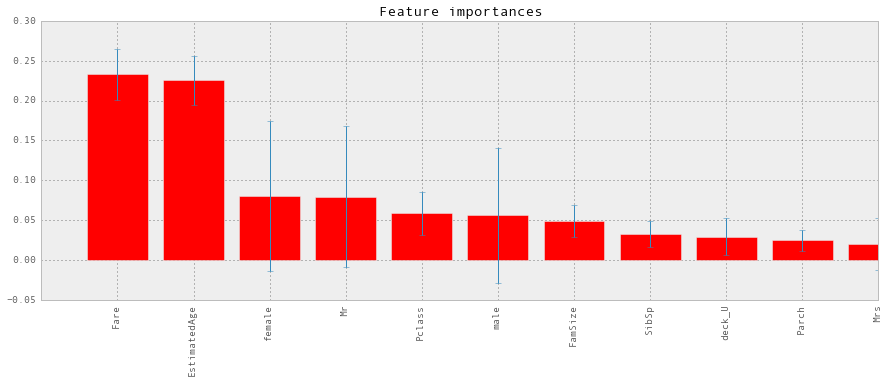

In [499]:
fig

## Save to csv

In [500]:
#RandonForest
rf_pred = rf.predict(test_x)
#AdaBoost
ab_pred = ab.predict(test_x)
#SVC
svc_pred = svc.predict(test_x_scaled)

In [501]:
result = pd.DataFrame(data={'PassengerId':test.index, 'Survived':rf_pred.astype('int')})
result.to_csv("rf_result_simple.csv", index=False)

result = pd.DataFrame(data={'PassengerId':test.index, 'Survived':svc_pred.astype('int')})
result.to_csv("svc_result_simple.csv", index=False)

result = pd.DataFrame(data={'PassengerId':test.index, 'Survived':ab_pred.astype('int')})
result.to_csv("ab_result_simple.csv", index=False)